# Laporan Praktikum 1 Kelompok 5 Komnum (B)
|    NRP     |      Name      |
| :--------: | :------------: |
| 5025241148 | Muhammad Zaky Zein  |
| 5025221160 | Hartmann Kanisius Galla' Massang |
| 5025221199 | Isabella Sienna Sulisthio|
---
### Soal:
Anda sudah mengerti algoritma pemrosesan metode Regula Falsi, dan anda sudah memahami cara kerjanya. Sekarang anda tinggal mengimplementasikan algoritma tersebut menjadi sebuah program komputer metode Regula Falsi (yang dapat menampilkan proses iteratif numerik, lengkap dengan grafik fungsinya).

---


### Penyelesaian:

**Penjelasan Kode**:

Dalam kode regula falsi yang digunakan perlu menggunakan beberapa library bawaan dari python seperti `numpy`, `matplotlib.pyplot`, dan `tabulate`.

* `numpy`: digunakan untuk perhitungan numerik dalam Python.
* `matplotlib.pyplot`: digunakan untuk membuat grafik fungsi dari penyelesaian regula falsi yang dicari.
* `tabulate`: digunakan untuk menampilkan hasil iterasi dalam bentuk table dalam terminal

Dalam kode tersebut, didefinisikan sebuah fungsi f(x) yang bersifat _editable_ (bisa diedit oleh user sesuai kebutuhan perhitungan). Fungsi inilah yang nantinya akan dicari akar persamaannya menggunakan metode regula falsi. Contohnya pada kode di atas didefinisikan sebagai berikut.
```py
def f(x):
    return x**3 - 100
```
Berarti kita ingin mencari penyelesaian persamaan f(x) = x^3-100 saat nilai f(x) = 0.

Selanjutnya di dalam kode tersebut terdapat fungsi `regula_falsi(func, a, b, tol, max_iter)` yang merupakan fungsi utama kode program tersebut untuk menerapkan metode regula falsi dalam menemukan akar penyelesaian untuk f(x) yang diberikan dan membuat tabel yang akan ditampilkan dalam terminal.

```py
def regula_falsi(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) >= 0:
        print("Kondisi f(a) * f(b) < 0 tidak terpenuhi.")
        print(f"f({a}) = {func(a):.6f}, f({b}) = {func(b):.6f}")
        return None, []

    c = a 
    history = [] 
    
    print(f"Mencari akar untuk f(x) = x^3 - 100 pada interval [{a}, {b}]")
    print("-" * 60)

    for i in range(max_iter):
        fa = func(a)
        fb = func(b)
        
        c_prev = c
        c = (a * fb - b * fa) / (fb - fa)
        
        fc = func(c)
        
        if i > 0:
            error = abs((c - c_prev) / c) if c != 0 else abs(c-c_prev)
        else:
            error = float('inf') 
            
        history.append([i + 1, a, b, c, fa, fb, fc, error])

        if abs(fc) < tol:
            break
            
        if fa * fc < 0:
            b = c
        else:
            a = c
            
    headers = ["Iterasi", "a", "b", "c", "f(a)", "f(b)", "f(c)", "Error Relatif"]
    print(tabulate(history, headers=headers, floatfmt=".7f", tablefmt="grid"))
    
    if abs(func(c)) < tol:
        print(f"\nKonvergensi tercapai setelah {len(history)} iterasi.")
        return c, history
    else:
        print(f"\nTidak konvergen setelah {max_iter} iterasi.")
        return c, history 
```

Parameter yang digunakan dalam fungsi `regula_falsi` adalah sebagai berikut.
* func : fungsi yang akan dicari akar penyelesaiannya
* a : titik x0 (interval bawah) 
* b : titik x1 (interval atas)
* tol: toleransi _error_ (10^-6)
* max_iter: batas maksimum iterasi pencarian akar


Adapun rumus metode regula falsi yang diimplementasikan dalam fungsi tersebut ialah:

![formula](img/regulafalsiformula.jpg)

Dimana rumus tersebut dapat dijalankan apabila nilai f(x0).f(x1) < 0. Apabila kondisi tersebut tidak terpenuhi maka tidak tentu bahwa akar penyelesaian ada di dalam rentang interval x0-x1.

```py
if func(a) * func(b) >= 0:
        print("Kondisi f(a) * f(b) < 0 tidak terpenuhi.")
        print(f"f({a}) = {func(a):.6f}, f({b}) = {func(b):.6f}")
        return None, []
```
Oleh karena itu apabila f(x0).f(x1) >= 0, maka fungsi langsung dihentikan.

Lakukan inisialisasi variabel `c` untuk menyimpan titik selanjutnya yang akan digunakan dalam perhitungan regula falsi dan `history` untuk menyimpan semua hasil iterasi yang telah dilakukan.

```py
c = a
history = []
```

Dalam implementasi pencarian akar penyelesaiannya, kita perlu melakukan loop hingga fungsi sudah mencapai toleransi _error_ yang sangat kecil (<10^-6). Lalu lakukan nilai f(a) dan f(b) dalam hal ini `fa` dan `fb`, dan definisikan c menjadi rumus regula-falsi yang akan digunakan. Selanjutnya, lakukan perhitungan nilai f(c) melalui variabel `fc`. Jika iterasi yang dilakukan bukan iterasi pertama, maka akan dihitung error relatifnya. Kemudian, hasil iterasi yang dihasilkan dapat disimpan ke dalam `history`. 

Langkah berikutnya, kita akan terus cek apakah nilai f(c) yang didapat sudah lebih kecil dari toleransi _error_ yang telah kita atur di awal yaitu 10^-6. Apabila, nilai f(c) yang dihasilkan sudah sangat mendekati angka 0, maka iterasi sudah dapat dihentikan. Namun, jika nilai f(c) belum lebih rendah dari toleransi _error_, maka lakukan update interval sesuai dengan tanda f(c) yang dihasilkan.

```py
for i in range(max_iter):
        fa = func(a)
        fb = func(b)
        
        c_prev = c
        c = (a * fb - b * fa) / (fb - fa)
        
        fc = func(c)
        
        if i > 0:
            error = abs((c - c_prev) / c) if c != 0 else abs(c-c_prev)
        else:
            error = float('inf') 
            
        history.append([i + 1, a, b, c, fa, fb, fc, error])

        if abs(fc) < tol:
            break
            
        if fa * fc < 0:
            b = c
        else:
            a = c
```

Setelah perhitungan per iterasi telah selesai dilakukan, tabel iterasi dapat ditampilkan dengan:
```py
headers = ["Iterasi", "a", "b", "c", "f(a)", "f(b)", "f(c)", "Error Relatif"]
    print(tabulate(history, headers=headers, floatfmt=".7f", tablefmt="grid"))
```

Banyak iterasi yang dilakukan juga dapat ditampilkan dengan menampilkan panjang dari `history`. Apabila sebuah fungsi setelah dilakukan _for-loop_ sebanyak 100 (max_iter), tetapi belum juga menemukan nilai f(c) < tol, maka fungsi tersebut bisa dikatakan tidak konvergen (divergen).

```py
if abs(func(c)) < tol:
        print(f"\nKonvergensi tercapai setelah {len(history)} iterasi.")
        return c, history
    else:
        print(f"\nTidak konvergen setelah {max_iter} iterasi.")
        return c, history 
```
Dengan demikian, apabila kode dijalankan, akan didapatkan _output_ sebagaimana yang dapat dilihat pada Gambar a.



Selain tabel hasil penyelesaian regula falsi yang akan ditampilkan dalam terminal, dalam soal disebutkan pula bahwa kita perlu menggambarkan grafik fungsi f(x) dalam pencarian akar persamaan dengan menggunakan metode tersebut. Oleh karena itu, dalam kode program `regulafalsi.py` dibuat sebuah fungsi `ans(func, history, root)` untuk membuat visualisasi grafik fungsi f(x).

```py
def ans(func, history, root):
    a_awal = history[0][1]
    b_awal = history[0][2]

    x_vals = np.linspace(a_awal - 0.5, b_awal + 0.5, 400)
    y_vals = func(x_vals)

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(x_vals, y_vals, 'b-', label=f'f(x) = x³ - 100', linewidth=2)
    
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

    for i, data in enumerate(history):
        iter_num, a, b, c, fa, fb, fc, err = data
        
        ax.plot([a, b], [fa, fb], 'r--', alpha=0.6, 
                label=f'Garis Iterasi {iter_num}' if i < 3 else "")
        
        ax.plot(a, fa, 'go', markersize=8, alpha=0.7)
        ax.plot(b, fb, 'go', markersize=8, alpha=0.7) 
        ax.plot(c, 0, 'kx', markersize=10, markeredgewidth=2)
        ax.plot(c, fc, 'ko', markersize=5)

    if root is not None:
        ax.plot(root, func(root), 'y*', markersize=15, markeredgewidth=1.5,
                markeredgecolor='black', label=f'Akar Ditemukan: x ≈ {root:.6f}')

    ax.set_title('Grafik Solusi Akar Persamaan dengan Regula Falsi', fontsize=16)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)
    
    last_a = history[-1][1]
    last_b = history[-1][2]
    ax.set_xlim([min(a_awal, last_a) - 0.2, max(b_awal, last_b) + 0.2])
    
    plt.show()
```

Lakukan penentuan interval gambar sebagai batas grafik dengan inisialisasi sebagai `history[0][1]` untuk nilai a awal dan `history[0][2]` untuk nilai b awal. Lalu, agar grafik dapat memuat nilai f(x) dan x secara kontinu maka lakukan pembuatan sebuah array dengan `np.linspace` untuk menampung nilai x dan f(x).

```py
a_awal = history[0][1]
b_awal = history[0][2]
x_vals = np.linspace(a_awal - 0.5, b_awal + 0.5, 400)
y_vals = func(x_vals)
```

lakukan inisialisasi grafik dengan menggunakan library `matplotlib (plt)`.

```py
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
```

Lalu, lakukan penggambaran grafik fungsi menggunakan informasi x dan f(x) yang didapatkan di dalam array yang telah dibuat dengan menggunakan `ax.plot`.

```py
ax.plot(x_vals, y_vals, 'b-', label='f(x) = x³ - 100', linewidth=2)
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
```

Penggambaran titik setiap iterasi dilakukan dengan _for-loop_ melalui akses `history` dan penggambaran titik dengan `ax.plot`.
```py
for i, data in enumerate(history):
        iter_num, a, b, c, fa, fb, fc, err = data
        
        ax.plot([a, b], [fa, fb], 'r--', alpha=0.6, 
                label=f'Garis Iterasi {iter_num}' if i < 3 else "")
        
        ax.plot(a, fa, 'go', markersize=8, alpha=0.7)
        ax.plot(b, fb, 'go', markersize=8, alpha=0.7) 
        ax.plot(c, 0, 'kx', markersize=10, markeredgewidth=2)
        ax.plot(c, fc, 'ko', markersize=5)
```

Penyelesaian regula falsi, akan ditampilkan ke dalam grafik dengan simbol bintang di posisi akar penyelesaian.
```py
if root is not None:
        ax.plot(root, func(root), 'y*', markersize=15, markeredgewidth=1.5,
                markeredgecolor='black', label=f'Akar Ditemukan: x ≈ {root:.6f}')
```


Grafik yang dihasilkan dapat ditambahkan informasi seperti judul, label sumbu x dan y, dan grid melalui `ax.set_title`, `ax.set_xlabel`, `ax.set_ylabel`, dan `ax.grid`.

```py
ax.set_title('Grafik Solusi Akar Persamaan dengan Regula Falsi', fontsize=16)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)
```

Baris kode ini bertujuan untuk mengatur batas sumbu x pada grafik agar titik yang terplot dapat terlihat jelas & tidak terpotong.
```py
    last_a = history[-1][1]
    last_b = history[-1][2]
    ax.set_xlim([min(a_awal, last_a) - 0.2, max(b_awal, last_b) + 0.2])
```

Untuk dapat menampilkan grafik yang telah dibuat, maka kita dapat menampilkannya dengan:
```py
plt.show()
```
Dengan demikian, didapatkan hasil gambar grafik seperti yang ditampilkan pada akhir laporan.

Mencari akar untuk f(x) = x^3 - 100 pada interval [4.0, 5.0]
------------------------------------------------------------
+-----------+-----------+-----------+-----------+-------------+------------+------------+-----------------+
|   Iterasi |         a |         b |         c |        f(a) |       f(b) |       f(c) |   Error Relatif |
+===========+===========+===========+===========+=============+============+============+=================+
|         1 | 4.0000000 | 5.0000000 | 4.5901639 | -36.0000000 | 25.0000000 | -3.2870593 |     inf         |
+-----------+-----------+-----------+-----------+-------------+------------+------------+-----------------+
|         2 | 4.5901639 | 5.0000000 | 4.6377884 |  -3.2870593 | 25.0000000 | -0.2454340 |       0.0102688 |
+-----------+-----------+-----------+-----------+-------------+------------+------------+-----------------+
|         3 | 4.6377884 | 5.0000000 | 4.6413098 |  -0.2454340 | 25.0000000 | -0.0180358 |       0.0007587 |
+-----------+-

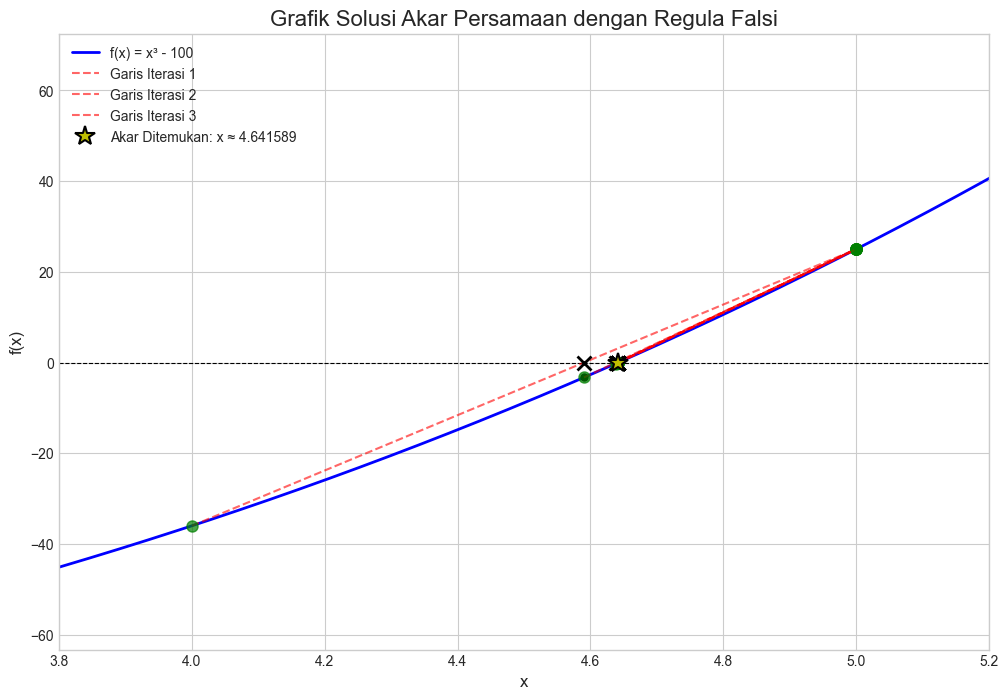

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x):
    return x**3 - 100

def regula_falsi(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) >= 0:
        print("Kondisi f(a) * f(b) < 0 tidak terpenuhi.")
        print(f"f({a}) = {func(a):.6f}, f({b}) = {func(b):.6f}")
        return None, []

    c = a 
    history = [] 
    
    print(f"Mencari akar untuk f(x) = x^3 - 100 pada interval [{a}, {b}]")
    print("-" * 60)

    for i in range(max_iter):
        fa = func(a)
        fb = func(b)
        
        c_prev = c
        c = (a * fb - b * fa) / (fb - fa)
        
        fc = func(c)
        
        if i > 0:
            error = abs((c - c_prev) / c) if c != 0 else abs(c-c_prev)
        else:
            error = float('inf') 
            
        history.append([i + 1, a, b, c, fa, fb, fc, error])

        if abs(fc) < tol:
            break
            
        if fa * fc < 0:
            b = c
        else:
            a = c
            
    headers = ["Iterasi", "a", "b", "c", "f(a)", "f(b)", "f(c)", "Error Relatif"]
    print(tabulate(history, headers=headers, floatfmt=".7f", tablefmt="grid"))
    
    if abs(func(c)) < tol:
        print(f"\nKonvergensi tercapai setelah {len(history)} iterasi.")
        return c, history
    else:
        print(f"\nTidak konvergen setelah {max_iter} iterasi.")
        return c, history 

def ans(func, history, root):
    a_awal = history[0][1]
    b_awal = history[0][2]

    x_vals = np.linspace(a_awal - 0.5, b_awal + 0.5, 400)
    y_vals = func(x_vals)

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(x_vals, y_vals, 'b-', label=f'f(x) = x³ - 100', linewidth=2)
    
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

    for i, data in enumerate(history):
        iter_num, a, b, c, fa, fb, fc, err = data
        
        ax.plot([a, b], [fa, fb], 'r--', alpha=0.6, 
                label=f'Garis Iterasi {iter_num}' if i < 3 else "")
        
        ax.plot(a, fa, 'go', markersize=8, alpha=0.7)
        ax.plot(b, fb, 'go', markersize=8, alpha=0.7) 
        ax.plot(c, 0, 'kx', markersize=10, markeredgewidth=2)
        ax.plot(c, fc, 'ko', markersize=5)

    if root is not None:
        ax.plot(root, func(root), 'y*', markersize=15, markeredgewidth=1.5,
                markeredgecolor='black', label=f'Akar Ditemukan: x ≈ {root:.6f}')

    ax.set_title('Grafik Solusi Akar Persamaan dengan Regula Falsi', fontsize=16)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)
    
    last_a = history[-1][1]
    last_b = history[-1][2]
    ax.set_xlim([min(a_awal, last_a) - 0.2, max(b_awal, last_b) + 0.2])
    
    plt.show()


if __name__ == "__main__":
    a = 4.0 
    b = 5.0  
    toleransi = 1e-7 
    
    akar, iterationans = regula_falsi(f, a, b, tol=toleransi)

    if akar is not None and iterationans:
        print(f"\nAkar yang ditemukan adalah x = {akar:.7f}")
        print(f"Nilai f(x) pada akar tersebut adalah f({akar:.7f}) = {f(akar):.7f}")
        
        ans(f, iterationans, akar)
    else:
        print("\nTidak dapat menemukan akar atau proses dihentikan.")